In [37]:
import copy, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(precision=2) 

<a name="toc_15456_2"></a>
#  Problem Statement

You will use the motivating example of housing price prediction. The training dataset contains three examples with four features (size, bedrooms, floors and, age) shown in the table below.  Note that, unlike the earlier labs, size is in sqft rather than 1000 sqft. This causes an issue, which you will solve in the next lab!

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

You will build a linear regression model using these values so you can then predict the price for other houses. For example, a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.  

Please run the following code cell to create your `X_train` and `y_train` variables.

<a name="toc_15456_3"></a>
#  Model Prediction With Multiple Variables
The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`

To demonstrate the dot product, we will implement prediction using (1) and (2).

<a name="toc_15456_3.1"></a>
## Single Prediction element by element
Our previous prediction multiplied one feature value by one parameter and added a bias parameter. A direct extension of our previous implementation of prediction to multiple features would be to implement (1) above using loop over each element, performing the multiply with its parameter and then adding the bias parameter at the end.


<a name="toc_15456_5"></a>
#  Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


<a name="toc_15456_5.1"></a>
## Compute Gradient with Multiple Variables
An implementation for calculating the equations (6) and (7) is below. There are many ways to implement this. In this version, there is an
- outer loop over all m examples. 
    - $\frac{\partial J(\mathbf{w},b)}{\partial b}$ for the example can be computed directly and accumulated
    - in a second loop over all n features:
        - $\frac{\partial J(\mathbf{w},b)}{\partial w_j}$ is computed for each $w_j$.
   

In [38]:
class multi_var_linear_regression :
    
    
        from logging import exception
        
        def __init__(self ,w_curr , b_curr , cost_f , iterations) :
            
            self.w_curr = w_curr
            self.b_curr = b_curr
            self.cost_f = cost_f
            self.iterations = iterations
            
        def compute_cost_function(self,x,y,w,b) :
            
            try :    
                
                m = x.shape[0]
                cost = 0.0
                for i in range(m):                                
                    f_wb_i = np.dot(x[i], w) + b           #(n,)(n,) = scalar (see np.dot)
                    cost = cost + (f_wb_i - y[i])**2       #scalar
                cost = cost / (2 * m)                      #scalar    
                return cost
            
            except Exception as e :
                print(e)
                
        def compute_gradient(self,x,y,w,b) :
            
            try:    
                m ,n = x.shape
                w_d = np.zeros((n,))
                b_d = 0.
                
                for i in range(m) :
                    err = (np.dot(x[i],w) + b) - y[i]
                    for j in range(n) :
                        w_d[j] = w_d[j] + err * x[i,j]
                    b_d = b_d + err
                
                w_d = w_d/m
                b_d = b_d/m
                
                return w_d , b_d         
            except Exception as e :
                print(e)    
        
        def coumpute_gradient_descent(self,x,y,w,b,compute_cost,compute_gradient,alpha,iterations) :
        
            try:
            
                w = copy.deepcopy(w)
                b = copy.deepcopy(b)
                
                for i in range (iterations) :
                    
                    w_d,b_d = self.compute_gradient(x , y , w , b)
                    
                    w = w - alpha * w_d
                    b = b - alpha * b_d
                    
                    if i<100000:      # prevent resource exhaustion 
                        self.cost_f.append(self.compute_cost_function(x, y, w, b))
                    
                    self.iterations.append(i)
                
                my_dict = {
                    'cost' : self.cost_f,
                    "iterations" : self.iterations
                }        
                
                gd = pd.DataFrame(my_dict)
                
                print("intercept : " , b)
                print("coeficient : " , w)
                
                return w , b , gd   
            
            except Exception as e :
                print(e)
        
        def predict(self,x,y,w_int)  :
            
            try:
                
                m,_ = x.shape   
                initial_w = np.zeros_like(w_int)
                initial_b = 0.

                alpha = float(input("Enter the learning rate : "))
                iterations = int(input("Enter the no. of iterations : "))

                w_final , b_final , gd = self.coumpute_gradient_descent(x,y,initial_w,initial_b,
                                                        self.compute_cost_function,self.compute_gradient,alpha,iterations)
                
                for i in range(m):
                    print(f"prediction: {np.dot(x[i], w_final) + b_final:0.2f}, target value: {y[i]}")
                
                J_hist = self.cost_f    
                fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
                ax1.plot(J_hist)
                ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
                ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
                ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
                ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
                plt.show()    
                
                
            except Exception as e :
                print(e)        

In [44]:
x = np.array([
            
            [2104, 5, 1, 45],
            [1416, 3, 2, 40],
            [852, 2, 1, 35]
            
            ])


df = pd.read_csv("/home/gokku/My codes/csv files/Advertising.csv")
x_train = df[['TV','Radio','Newspaper']]
x_train = np.array(x_train)
print(x_train)
y_train = df.Sales
# x_train = np.array(x_train).reshape(-1,1)
y = np.array([460, 232, 178])
m,n=x_train.shape
b_init = 785.1811367994083
w_init = np.random.randn(n)


[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6 114. ]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3  23.9  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   9.9  35.7]
 [239.9  41.5

intercept :  0.000976659179224189
coeficient :  [0.07 0.04 0.03]
prediction: 20.66, target value: 22.1
prediction: 6.15, target value: 10.4
prediction: 5.13, target value: 9.3
prediction: 14.60, target value: 18.5
prediction: 15.69, target value: 12.9
prediction: 4.79, target value: 7.2
prediction: 6.19, target value: 11.8
prediction: 10.00, target value: 13.2
prediction: 0.75, target value: 4.8
prediction: 15.62, target value: 10.6
prediction: 5.90, target value: 8.6
prediction: 16.94, target value: 17.4
prediction: 5.13, target value: 9.2
prediction: 7.75, target value: 9.7
prediction: 17.82, target value: 19.0
prediction: 17.92, target value: 22.4
prediction: 9.99, target value: 12.5
prediction: 24.11, target value: 24.4
prediction: 6.46, target value: 11.3
prediction: 12.41, target value: 14.6
prediction: 18.93, target value: 18.0
prediction: 18.58, target value: 12.5
prediction: 3.13, target value: 5.6
prediction: 18.41, target value: 15.5
prediction: 5.67, target value: 9.7
predi

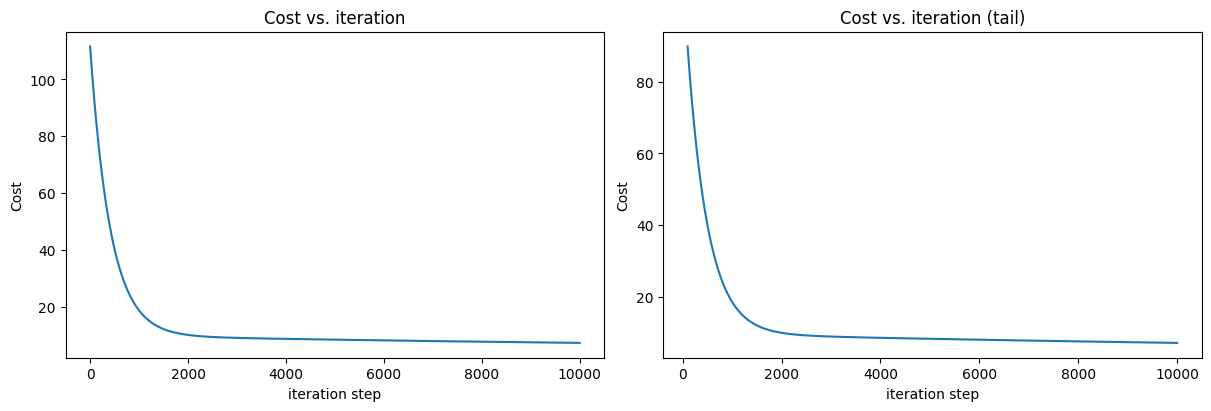

In [54]:
lr =multi_var_linear_regression([],0,[],[])
lr.predict(x_train,y_train,w_init)